# **Bank Customer Churn Prediction**

### Business Problem Statement
**Problem Description** <br>
The bank faces a high customer churn rate, with approximately 20% of clients leaving annually. This leads to significant revenue losses and increased costs associated with acquiring new customers. <br> <br>
**Why It Matters** <br>
Customer churn negatively impacts the bank’s profitability, reduces the lifetime value of customers, and increases marketing expenditures to attract new clients. Retaining existing customers is more cost-effective than acquiring new ones. <br> <br>
**Project Goal** <br>
Reduce customer churn by at least 15% through the development of a predictive model to identify high-risk customers and take proactive retention measures.

### Objectives
**Main Objective:** <br>
Develop a machine learning model that predicts customer churn with high accuracy, allowing the bank to identify clients most likely to leave. <br> <br>
**Secondary Objectives:** 
- Analyze the primary factors contributing to customer churn, such as account activity, product usage, and demographic data. <br>
- Reduce marketing costs by focusing retention efforts on customers with a higher probability of staying. <br>
- Enhance customer satisfaction through personalized engagement strategies.

### Stakeholders
- **Bank Executives:** require insights into churn patterns to develop strategic initiatives. <br>
- **Marketing Department:** use predictive insights to design targeted campaigns aimed at retaining at-risk customers. <br>
- **Customer Service:** improve customer care.

### Business Metrics
- **Churn Rate:** decrease from 20% to 15% within the first year. <br>
- **Retention Rate:** increase from 80% to 85%. <br>
- **Revenue Growth:** achieve a 10% increase in revenue from retained customers. <br>
- **Marketing ROI:** improve campaign efficiency by 15% through targeted retention efforts.

### Solution Overview
**Solution Description:** <br>
A predictive analytics solution will be developed using machine learning algorithms. The model will analyze customer data, including demographic, transactional, and behavioral attributes, to predict the likelihood of churn. <br>

**Expected Benefits:** <br>
- Enable the bank to identify at-risk customers early and implement retention strategies. <br>
- Optimize marketing campaigns by prioritizing high-risk segments. <br>
- Reduce customer acquisition costs by retaining more existing clients.

### Implementation Plan
Steps: <br>
- Data Collection: aggregate customer data, including account balances, transaction history, product usage, and complaints. <br>
- Data Preparation: clean and preprocess the data for analysis, handling missing values. <br>
- Model Development: train machine learning models  to predict churn. <br>
- Model Evaluation: validate the models using metrics like accuracy, precision, recall, and F1-score. <br>
- Integration: deploy the best-performing model into the bank’s CRM system for real-time churn prediction. <br>

Resources: <br>
- Tools: Python (pandas, numpy, seaborn, matplotlib, sklearn)

### Challenges
- **Data Quality:** missing or inconsistent data can negatively impact model accuracy and reliability. <br>
- **Dynamic Behavior:** customer behavior and preferences change over time, which can decrease model performance and necessitate regular retraining and updates. <br>
- **Class Imbalance:** churn data is often imbalanced, with significantly fewer customers classified as churners compared to non-churners. <br>

### Expected Outcomes
**Short-Term:** <br>
- Identification of high-risk customers for immediate retention efforts. <br>
- Improved understanding of churn drivers. <br> 

**Long-Term:**
- Increased revenue due to higher customer retention. <br>
- Reduced marketing costs by focusing on high-risk segments. <br>

### Business Value
**Direct Benefits:** 
- Lower churn rates, resulting in cost savings and stabilized revenue. <br>
- Higher customer lifetime value due to increased retention. <br>

**Indirect Benefits:**
- Enhanced customer satisfaction through targeted interventions. <br>
- Strengthened competitive position in the market. <br>


### Project Stages
1. Data review
1. Data cleaning
1. EDA
1. Feature engineering
1. Model selection and evaluation

In [1]:
# importing libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display

### Data review

Dataset contains 10,000 records and 14 atributes, covering various characteristics of bank customers.

Description of each column:
- RowNumber: A unique identifier for each row in the dataset.
- CustomerId: A unique identifier for each bank customer.
- Surname: The customer's surname.
- CreditScore: The customer's credit score, which may influence their creditworthiness.
- Geography: The geographic location of the customer (country or region).
- Gender: The customer's gender (male or female).
- Age: The customer's age.
- Tenure: The length of the customer's relationship with the bank (in years).
- Balance: The customer's current account balance.
- NumOfProducts: The number of bank products the customer has (e.g., credit cards, deposits).
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no).
- IsActiveMember: The customer's activity status with the bank (1 = active, 0 = inactive).
- EstimatedSalary: The customer's estimated salary.
- Exited: The target variable indicating whether the customer has left the bank (1 = exited, 0 = stayed).

In [2]:
# load data

df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

### Data validation

- Data type: Balance and EstimatedSalary should be converted to a discrete value <br>
- Zero values in the data are absent <br>
- The dataset does not contain duplicate records <br>
- The RowNumber, CustomerId, Surname attributes do not contain information that affects customer churn, so they have been removed

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# change data type

df[['Balance']] = df[['Balance']].astype(int)
df[['EstimatedSalary']] = df[['EstimatedSalary']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int32 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int32 
 13  Exited           10000 non-null  int64 
dtypes: int32(2), int64(9), object(3)
memory usage: 1015.8+ KB


In [6]:
# check null values

df.isnull().sum().to_frame().rename(columns={0:"Total Number of Missing Values"})

,Total Number of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
# checking for duplicate rows

df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [9]:
# drop unimportant rows

df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

### Analysis of mean values of customer characteristics by churn category

**Credit Score:** customers who stayed have slightly better credit scores on average, suggesting that financial stability might influence retention <br>
**Age and Tenure:** customers with longer tenure are more likely to stay. Customers who exited are on average older than those who stayed <br>
**Balance and Estimated Salary:** customers with higher balances and estimated salaries tend to exit the bank, potentially signaling that wealthier customers may be more inclined to switch banks <br>
**Activity Levels:**  activity levels stand out as a strong indicator of churn, with churned customers showing significantly lower activity levels <br>

In [10]:
numeric_df = df.select_dtypes(include=['number'])
grouped_means = df.select_dtypes(include=['number']).groupby(df['Exited']).mean()
styled_table = grouped_means.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
).background_gradient(cmap="Greens")

display(styled_table)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,,,,,,,,,
0,651.853196,37.408389,5.033279,72744.992842,1.544267,0.707146,0.554565,99737.901293,0.000000
1,645.351497,44.837997,4.932744,91108.167403,1.475209,0.699067,0.360825,101465.182131,1.000000


### Distribution of the numeric features

**The bank's customer base:** <br>
Most clients use 1-2 banking products and have been cooperating with the bank for 3 to 7 years, which indicates the stability of the customer base. The age range is mainly from mainly from 32 to 44 years old, which indicates that most active customers are middle-aged people. 70% of customers have a credit card and are active users of the bank.

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700
std,96.653299,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,718.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,850.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000


### Visualisation of class distribution

The customer churn rate is 20%, and the retention rate is 80%. This indicates an uneven distribution of classes in the dataset. 

In [12]:
# main sets for visualisations

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#3c6e71', '#eaac8b']) 
plt.rcParams['figure.facecolor'] = 'white' 
plt.rcParams['axes.facecolor'] = '#f8f8f8'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14 
plt.rcParams['axes.labelsize'] = 12 

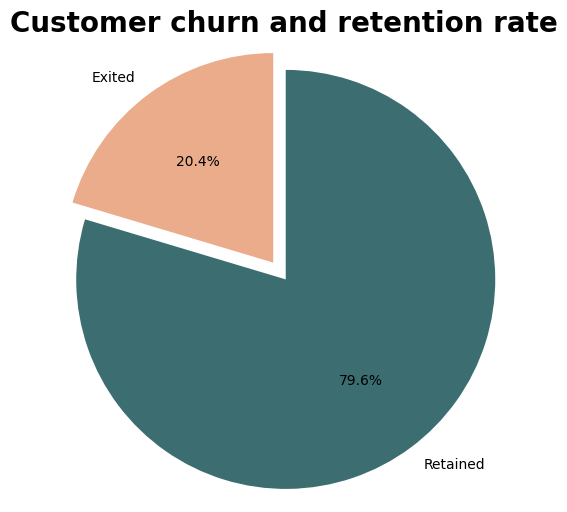

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
colors = ['#eaac8b', '#3c6e71'] 
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Customer churn and retention rate", size=20)
plt.show()

### Analysis of categorical variables

- The dataset covers clieent churn data from three countries: France, Germany and Spain. Among these countries, France accounts for 50% of the customer base, followed by Germany and Spain, each with 25% of customers. Germany has the highest customer churn rate, with approximately 32% of its customers. In comparison, France and Spain have churn rates of approximately 16% among their respective customer bases
- The outflow rate of female customers is also higher than that of male customers
- More than 70% of customers use credit cards, and the probability of churn among clients with and without credit cards is almost the same, with a ratio of 1:4. This confirms that having a credit card does not have a significant impact on the probability of customer churn
- Among active members, the churn rate is 14%, while among inactive members, the churn rate is about 27%. This suggests that inactive customers are more likely to churn. The overall share of inactive customers is quite high (48%), which suggests that the bank may need a program aimed at converting this group into active clients, as this would certainly have a positive impact on the bank's overall efficiency

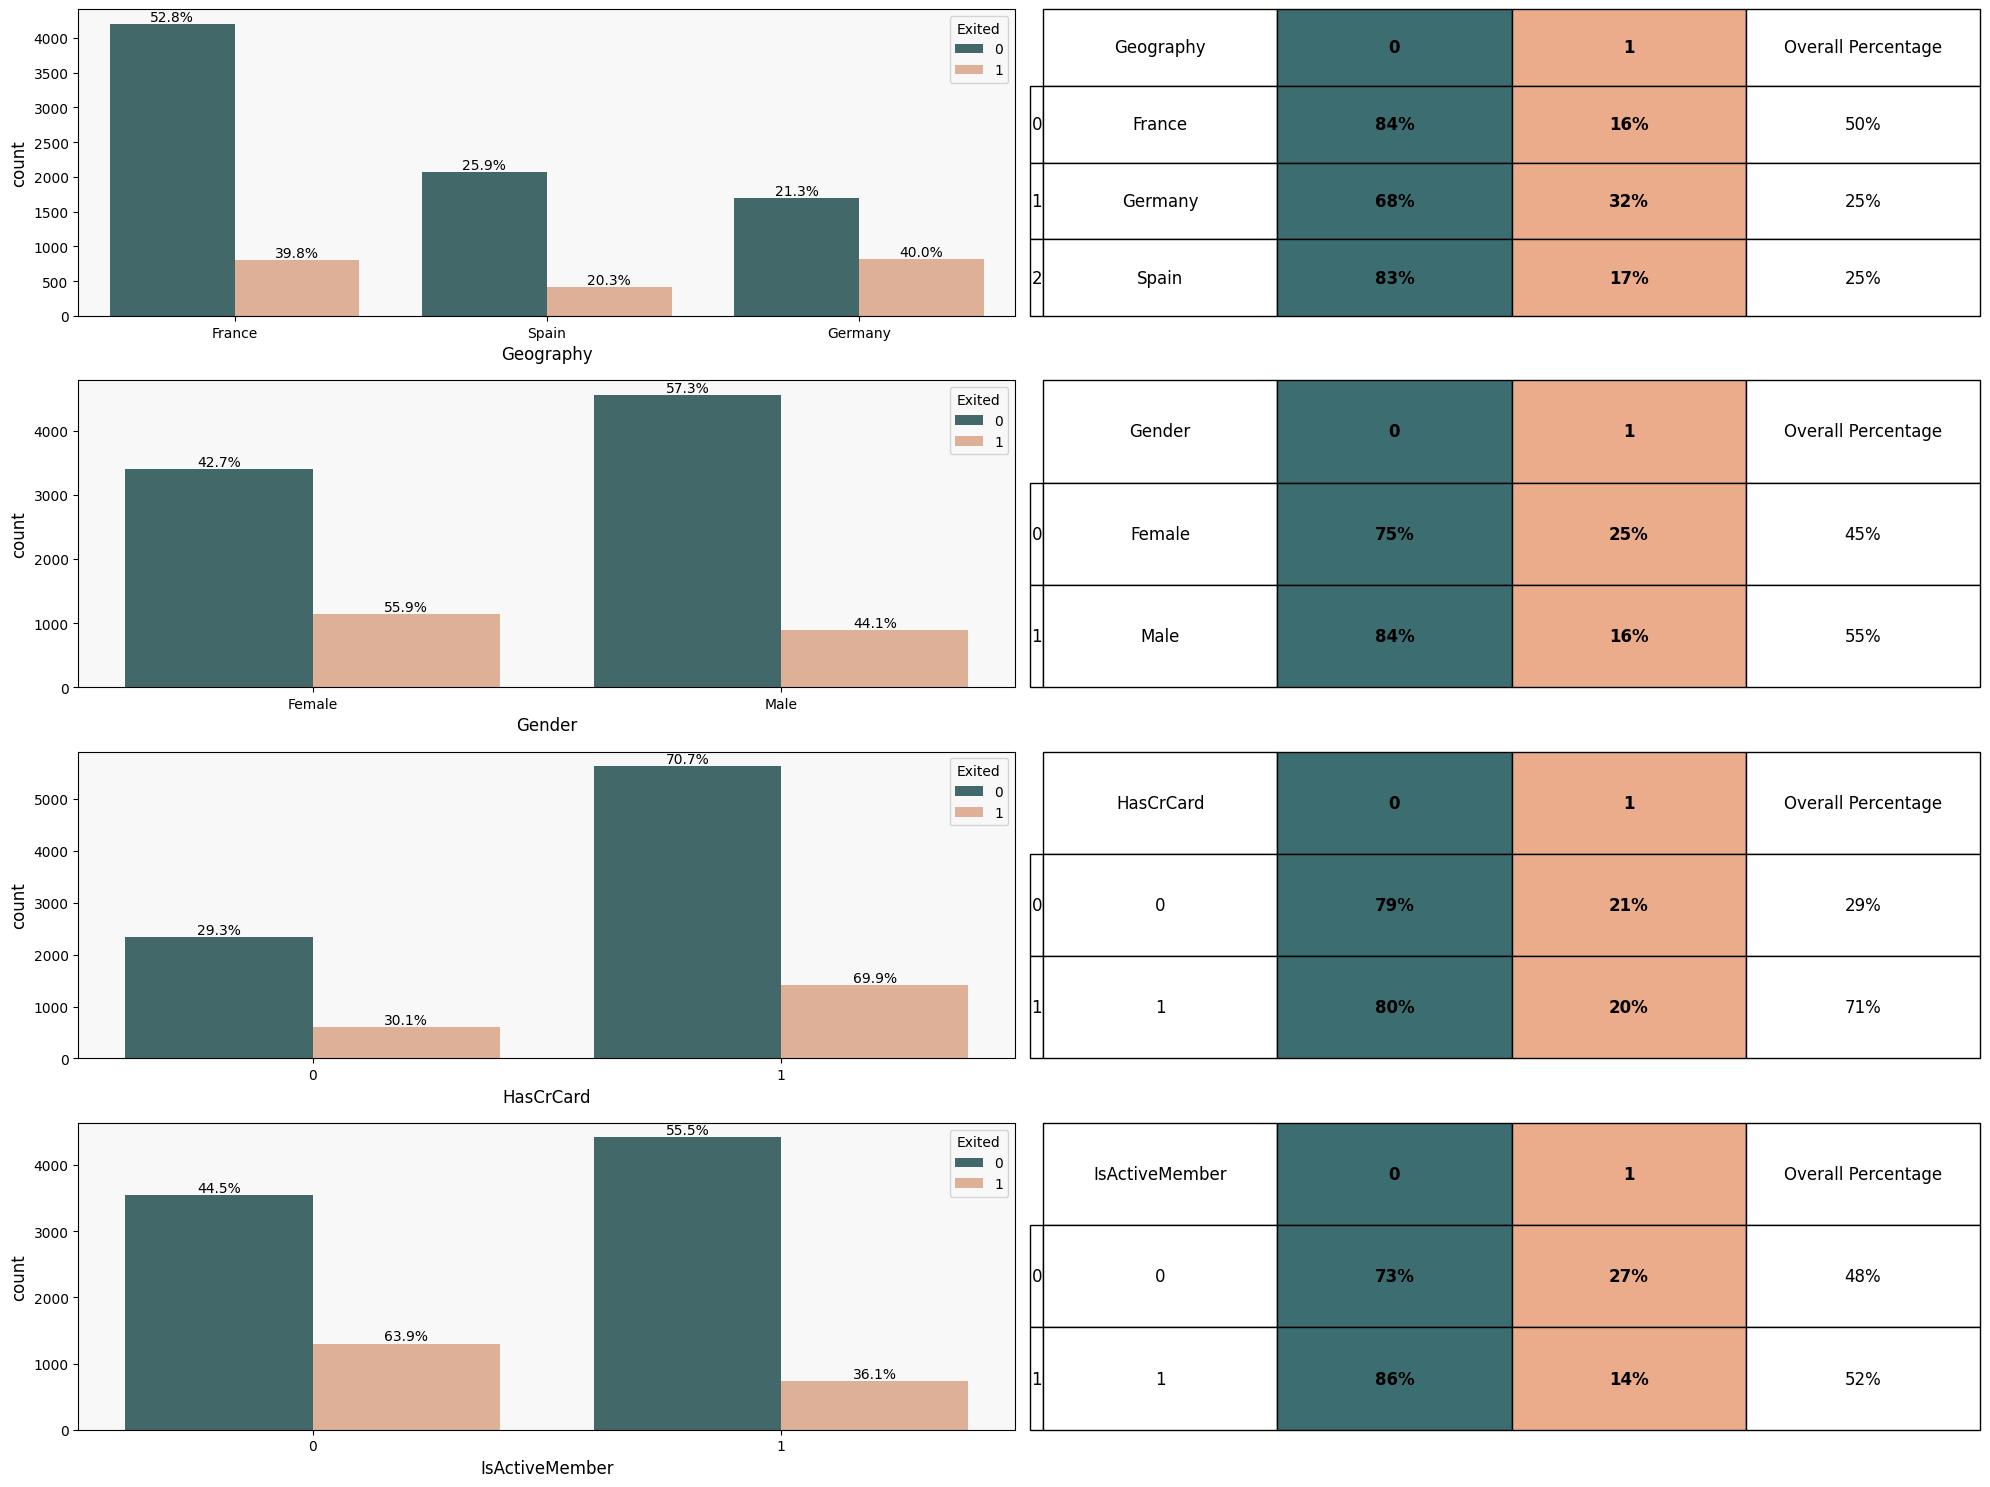

In [14]:
def create_countplot(ax, data, x_column, hue_column):
    sns.countplot(x=x_column, hue=hue_column, data=data, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', labels=[
            f"{(val / sum(container.datavalues) * 100):.1f}%" for val in container.datavalues
        ])

def create_table(ax, data, x_column, hue_column):
    
    distribution = data[x_column].value_counts(normalize=True).mul(100).reset_index()
    distribution.columns = [x_column, 'Percentage']
    
    churn_distribution = data.groupby(x_column)[hue_column].value_counts(normalize=True).mul(100).unstack().fillna(0)
    
    churn_distribution = churn_distribution.apply(lambda x: x.round(0)) 
    churn_distribution = churn_distribution.applymap(lambda x: f"{x:.0f}%")  
    
    overall_distribution = data[x_column].value_counts(normalize=True).mul(100).reset_index()
    overall_distribution.columns = [x_column, 'Overall Percentage']
    overall_distribution['Overall Percentage'] = overall_distribution['Overall Percentage'].apply(lambda x: f"{x:.0f}%")
    
    churn_distribution = churn_distribution.merge(overall_distribution, on=x_column)
    
    table = ax.table(cellText=churn_distribution.values,
                    colLabels=churn_distribution.columns,
                    rowLabels=churn_distribution.index,
                    loc='center', cellLoc='center', colLoc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (i, j), cell in table.get_celld().items():
        if j == 1:  
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#3c6e71') 
        elif j == 2:  
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#eaac8b')  
        else:
            cell.set_fontsize(12)
    
    ax.axis('off') 

fig, axarr = plt.subplots(4, 2, figsize=(20, 15))

create_countplot(axarr[0][0], df, 'Geography', 'Exited')
create_table(axarr[0][1], df, 'Geography', 'Exited')

create_countplot(axarr[1][0], df, 'Gender', 'Exited')
create_table(axarr[1][1], df, 'Gender', 'Exited')

create_countplot(axarr[2][0], df, 'HasCrCard', 'Exited')
create_table(axarr[2][1], df, 'HasCrCard', 'Exited')

create_countplot(axarr[3][0], df, 'IsActiveMember', 'Exited')
create_table(axarr[3][1], df, 'IsActiveMember', 'Exited')

plt.tight_layout()
plt.show()


### Analysis of numerical variables

- The credit score of clients ranges from 350 to 850, reflecting the difference in their creditworthiness. All clients with a credit score below 400 churned - this underscores the importance of credit score as a potential factor contributing to customer churn. <br>
- Clients aged 50 to 60 exhibit a notably high churn rate of approximately 56%, indicating the need for focused retention strategies for this demographic. The age distribution is positively skewed, with fewer older customers, suggesting that age should be considered as a key factor when predicting churn <br>
- clients who have been with the bank for less than 3 years, as well as those who have been with the bank for more than 8 years, show higher churn tendencies, suggesting that both relatively new and long-standing customers may need targeted engagement efforts to reduce churn <br>
- Customers with larger account balances are more likely to churn. This could indicate that higher-value customers may be dissatisfied with the services offered or that they find more attractive alternatives <br>
- Clients preferences tend to cluster around having 1 or 2 products, with a combined total of approximately 96.7% of customers choosing these options. Notably, customers with 3 card products are significantly more likely to churn, with 82% of them leaving the bank. The fact that all customers with 4 products stopped using the bank further highlights that overloading customers with products might lead to dissatisfaction <br>
- Salary levels do not show a significant difference between the groups that stayed and those that churned

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

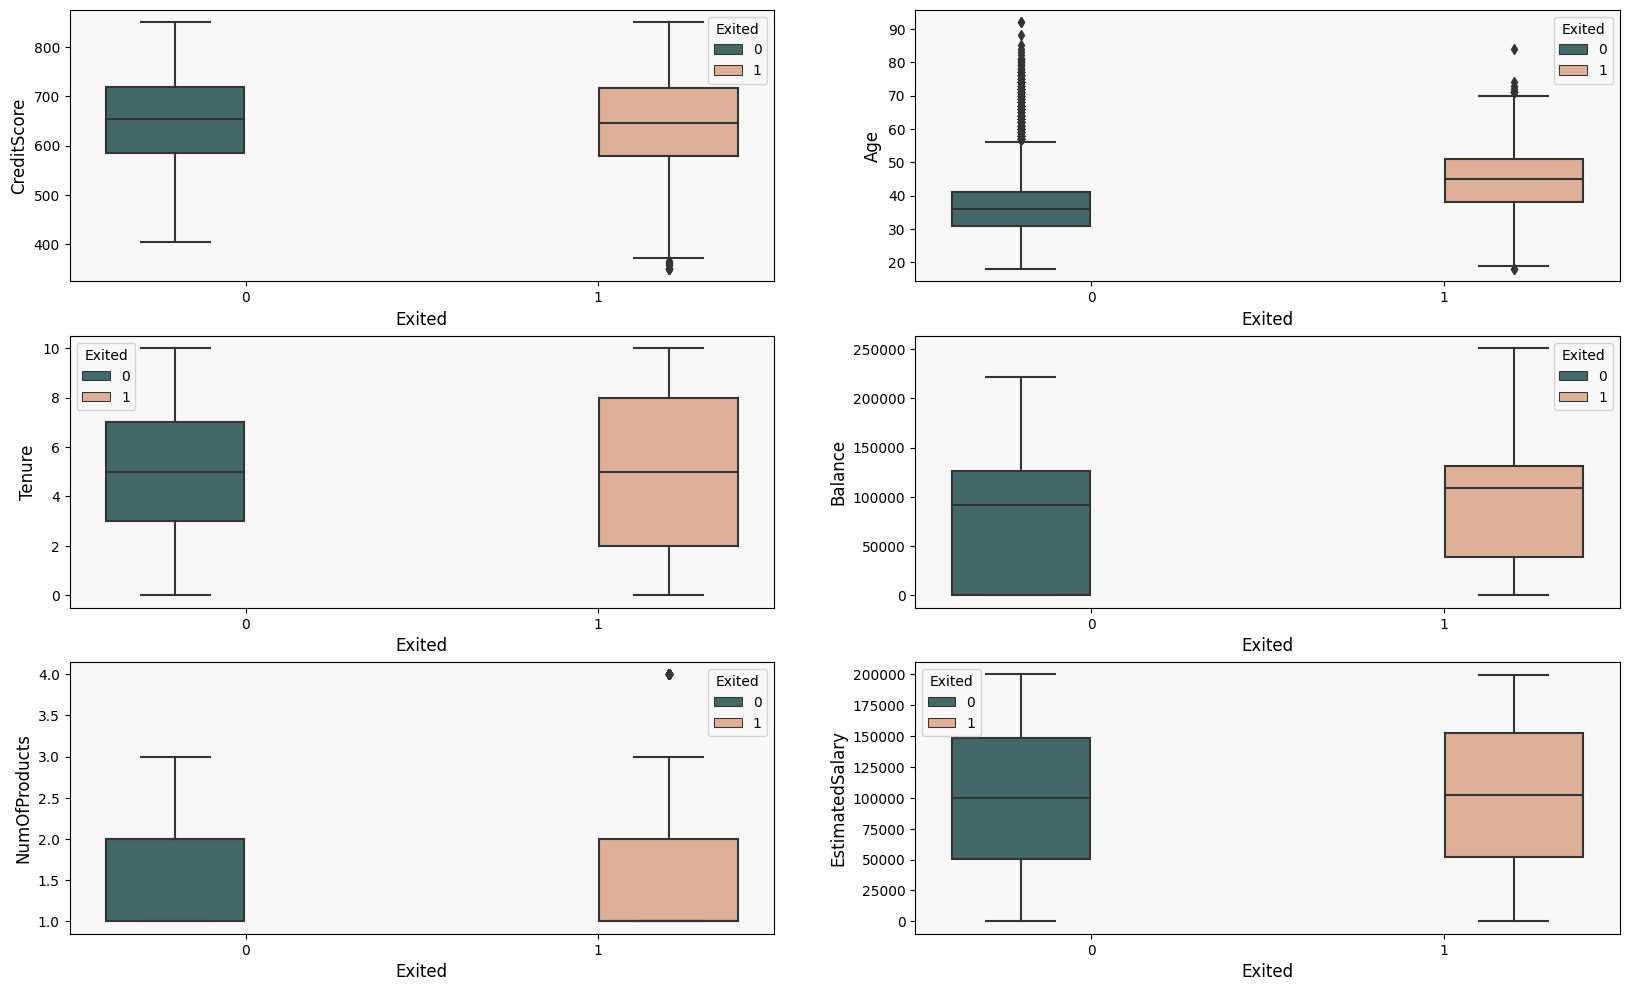

In [15]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

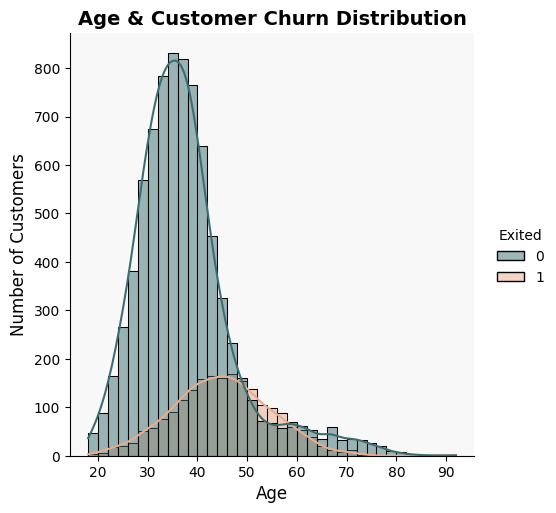

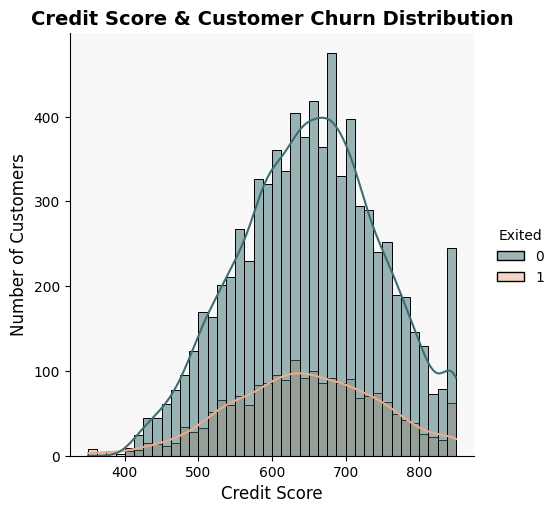

In [16]:
sns.displot(data=df, x='Age', hue='Exited',kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True, bins=40)
    
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

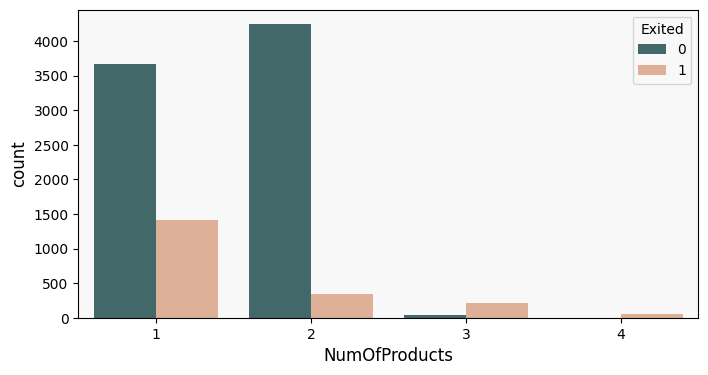

In [17]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df)
plt.show()

### Feature engineering

- Taking into account the results obtained, it would be reasonable to combine customers who have more than two products in one group <br>
- Categorical nominal values must be converted using One-Hot encoding <br>
- Categorical ordinal values must be converted using Label encoding <br>

<Axes: xlabel='NumOfProducts', ylabel='count'>

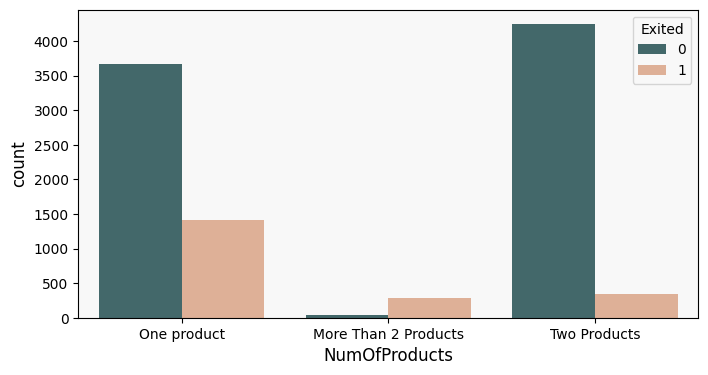

In [18]:
# combine customers who have more than two products in one group

conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values = ["One product","Two Products","More Than 2 Products"]
df["NumOfProducts"] = np.select(conditions,values)
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df)

In [19]:
# One-Hot encoding for categorical nominal vals

one_hot_encoded = pd.get_dummies(df[['Geography','Gender']])
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

df_encoded.drop(['Geography','Gender'],axis=1,inplace=True)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,One product,1,1,101348,1,True,False,False,True,False
1,608,41,1,83807,One product,0,1,112542,0,False,False,True,True,False
2,502,42,8,159660,More Than 2 Products,1,0,113931,1,True,False,False,True,False
3,699,39,1,0,Two Products,0,0,93826,0,True,False,False,True,False
4,850,43,2,125510,One product,1,1,79084,0,False,False,True,True,False


In [20]:
# Label encoding for categorical ordinal vals

label_encoder = LabelEncoder()
df_encoded['NumOfProducts'] = label_encoder.fit_transform(df_encoded['NumOfProducts'])
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,True,False,False,True,False
1,608,41,1,83807,1,0,1,112542,0,False,False,True,True,False
2,502,42,8,159660,0,1,0,113931,1,True,False,False,True,False
3,699,39,1,0,2,0,0,93826,0,True,False,False,True,False
4,850,43,2,125510,1,1,1,79084,0,False,False,True,True,False


### Analysis of dependencies between attributes

The existing correlations between the variables are not significant

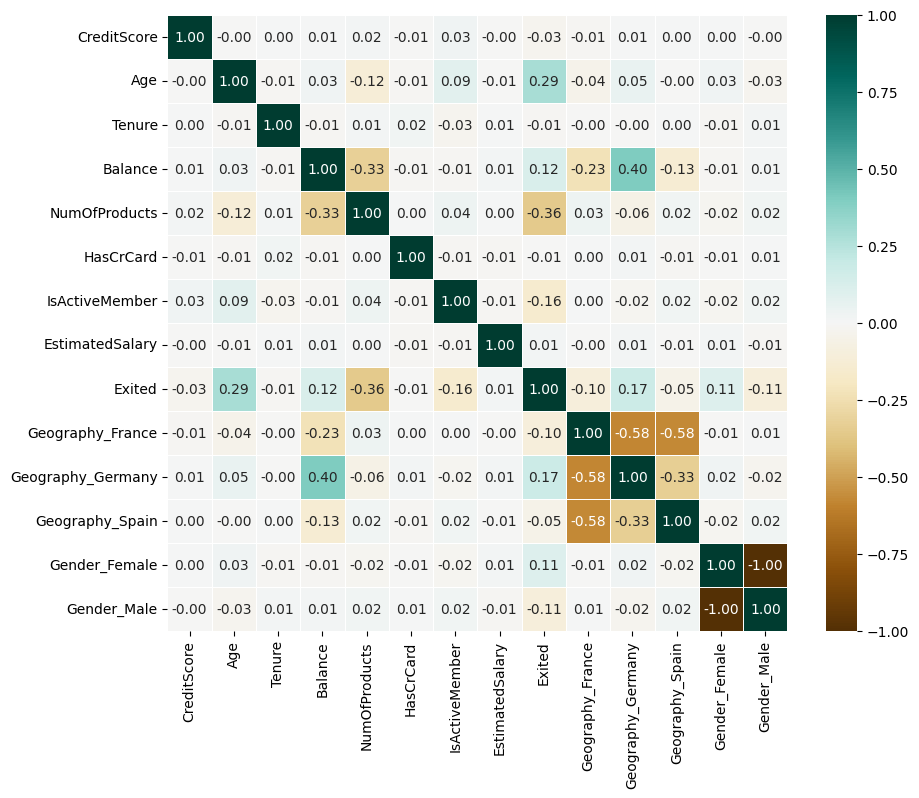

In [21]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5)
plt.show()

### Prediction models

In [22]:
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print("Shape of x_train is:",X_train.shape)
print("Shape of x_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 13)
Shape of x_test is:  (2000, 13)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', XGBClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))


The CatBoost model performs well on the unbalanced dataset with an impressive accuracy of 87%. However, the model's ability to correctly predict customer churn (the outflow class) is just above 50%, which is considered a poor result. To improve this parameter, imbalance should be avoided


Results Table:
      Model  Accuracy  Precision  Recall  F1 Score  Execution Time (s)
0        LR    0.8460   0.831627  0.8460  0.833777            0.015633
1       KNN    0.8330   0.815727  0.8330  0.819481            0.205295
2      CART    0.7940   0.801458  0.7940  0.797452            0.062502
3        RF    0.8745   0.866026  0.8745  0.865223            0.979115
4       SVM    0.8680   0.859825  0.8680  0.852288            1.392809
5       XGB    0.8650   0.856918  0.8650  0.859137            0.659888
6  CatBoost    0.8760   0.868096  0.8760  0.868756            3.269091


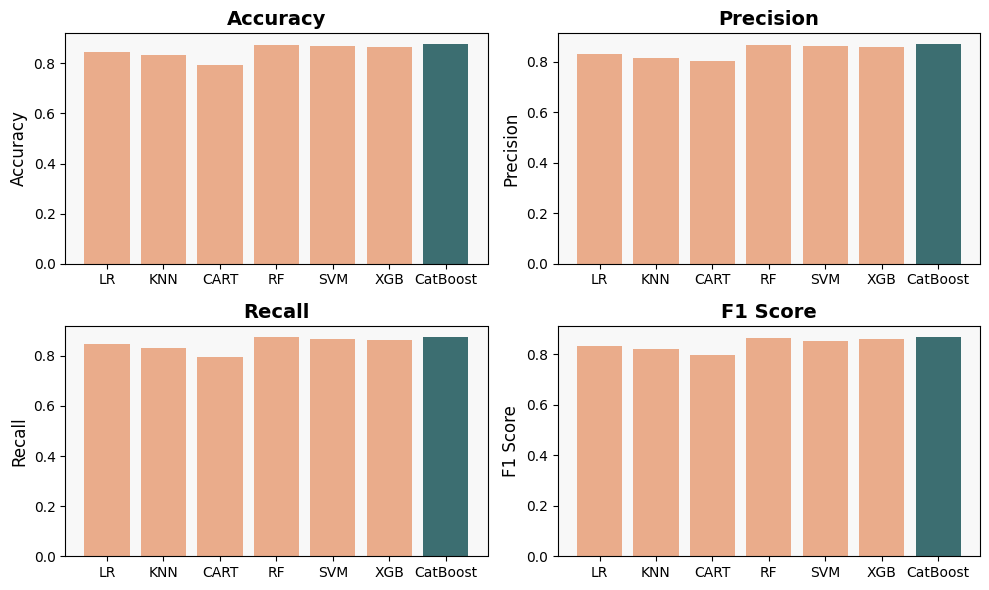

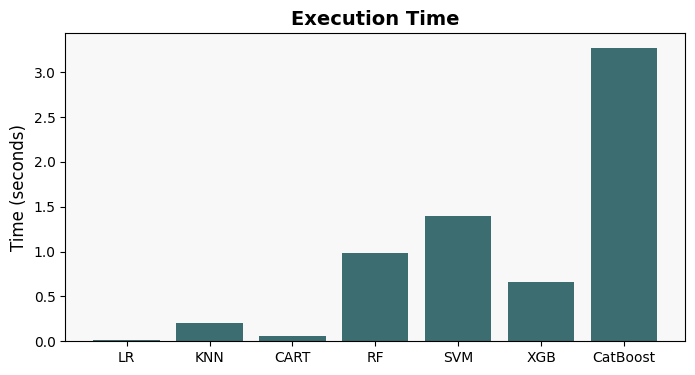

In [26]:
names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
times = []

for name, model in models:
    start_time = time.time() 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    end_time = time.time() 
    
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")  
    f1 = f1_score(y_test, y_pred, average="weighted")  
    elapsed_time = end_time - start_time  
    
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    times.append(elapsed_time)

best_accuracy_index = accuracies.index(max(accuracies))
best_precision_index = precisions.index(max(precisions))
best_recall_index = recalls.index(max(recalls))
best_f1_index = f1_scores.index(max(f1_scores))
best_time_index = times.index(min(times))  

results_df = pd.DataFrame({
    'Model': names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Execution Time (s)': times
})

print("\nResults Table:")
print(results_df)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].bar(names, accuracies, color='#eaac8b')
ax[0, 0].bar(names[best_accuracy_index], accuracies[best_accuracy_index], color='#3c6e71')  
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Accuracy')

ax[0, 1].bar(names, precisions, color='#eaac8b')
ax[0, 1].bar(names[best_precision_index], precisions[best_precision_index], color='#3c6e71')  
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Precision')

ax[1, 0].bar(names, recalls, color='#eaac8b')
ax[1, 0].bar(names[best_recall_index], recalls[best_recall_index], color='#3c6e71') 
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Recall')

ax[1, 1].bar(names, f1_scores, color='#eaac8b')
ax[1, 1].bar(names[best_f1_index], f1_scores[best_f1_index], color='#3c6e71') 
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(names, times)
plt.title('Execution Time')
plt.ylabel('Time (seconds)')
plt.show()


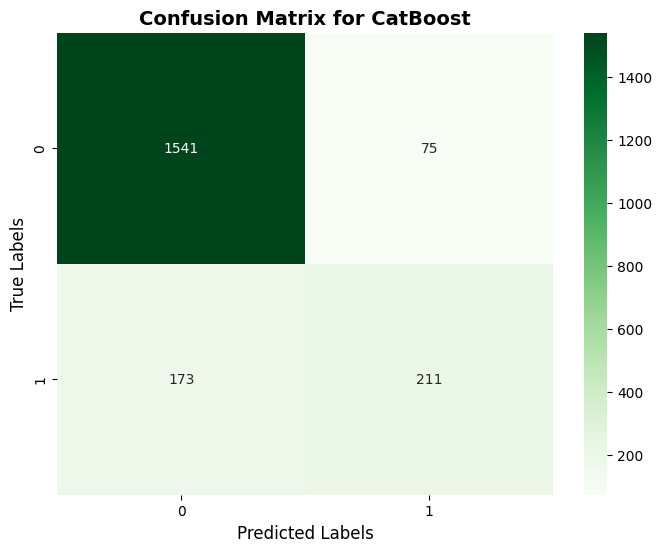

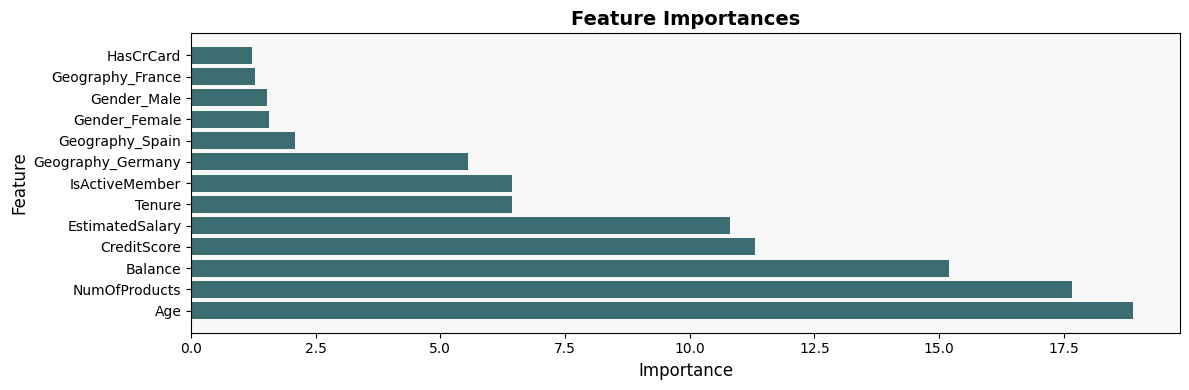

In [27]:
best_model_index = f1_scores.index(max(f1_scores))
best_model_name = names[best_model_index]
best_model = models[best_model_index][1]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 4))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices])
plt.yticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

### Using undersampling

After the number of records of a larger class was reduced, CatBoost's accuracy increased to 89%, and its ability to identify the churn class improved by 30%.

In [28]:
class_distribution_before = Counter(df['Exited'])

near_miss = NearMiss(version=2) 
X_resampled, y_resampled = near_miss.fit_resample(X, y)
class_distribution_after = Counter(y_resampled)

class_distribution_before, class_distribution_after

(Counter({0: 7963, 1: 2037}), Counter({0: 2037, 1: 2037}))


Results Table:
      Model  Accuracy  Precision    Recall  F1 Score  Execution Time (s)
0        LR  0.743558   0.745878  0.743558  0.743342            0.028744
1       KNN  0.784049   0.798264  0.784049  0.782163            0.063869
2      CART  0.823313   0.823322  0.823313  0.823273            0.031251
3        RF  0.871166   0.874514  0.871166  0.871036            0.487997
4       SVM  0.871166   0.877420  0.871166  0.870849            0.266204
5       XGB  0.873620   0.876013  0.873620  0.873549            0.283634
6  CatBoost  0.888344   0.892562  0.888344  0.888192            2.182484


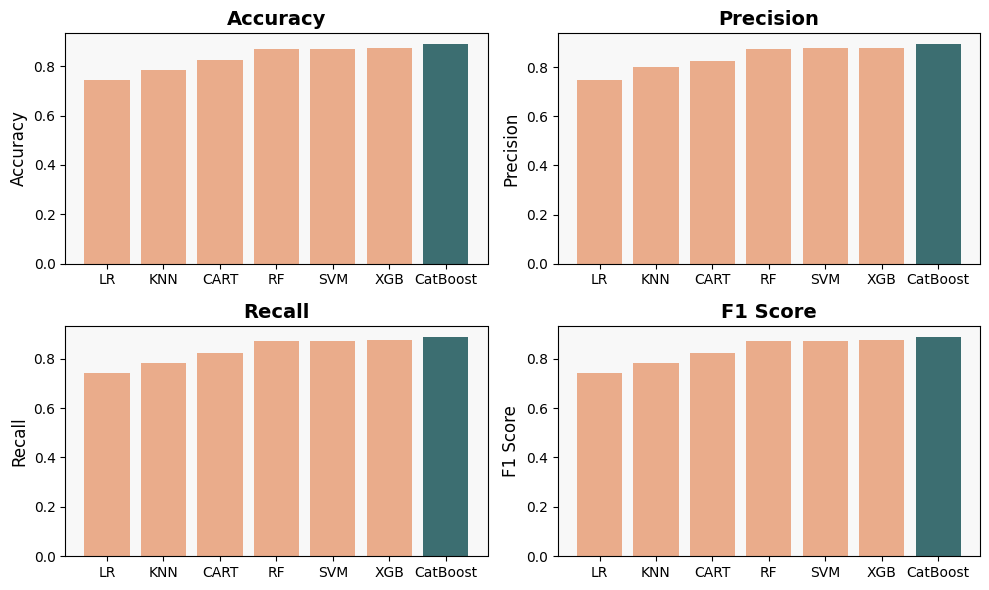

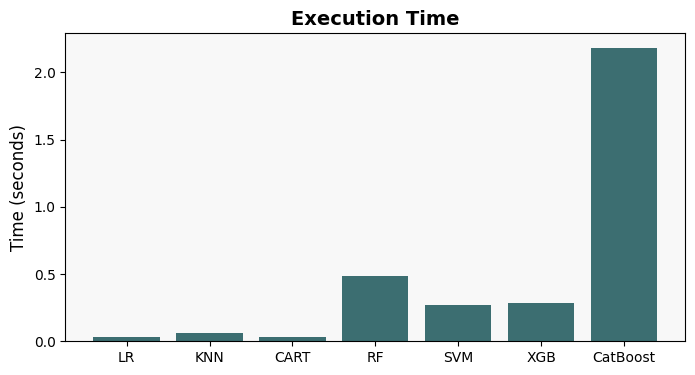

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
times = []

for name, model in models:
    start_time = time.time() 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    end_time = time.time() 
    
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")  
    f1 = f1_score(y_test, y_pred, average="weighted")  
    elapsed_time = end_time - start_time  
    
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    times.append(elapsed_time)

best_accuracy_index = accuracies.index(max(accuracies))
best_precision_index = precisions.index(max(precisions))
best_recall_index = recalls.index(max(recalls))
best_f1_index = f1_scores.index(max(f1_scores))
best_time_index = times.index(min(times))  

results_df = pd.DataFrame({
    'Model': names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Execution Time (s)': times
})

print("\nResults Table:")
print(results_df)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].bar(names, accuracies, color='#eaac8b')
ax[0, 0].bar(names[best_accuracy_index], accuracies[best_accuracy_index], color='#3c6e71')  
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Accuracy')

ax[0, 1].bar(names, precisions, color='#eaac8b')
ax[0, 1].bar(names[best_precision_index], precisions[best_precision_index], color='#3c6e71')  
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Precision')

ax[1, 0].bar(names, recalls, color='#eaac8b')
ax[1, 0].bar(names[best_recall_index], recalls[best_recall_index], color='#3c6e71') 
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Recall')

ax[1, 1].bar(names, f1_scores, color='#eaac8b')
ax[1, 1].bar(names[best_f1_index], f1_scores[best_f1_index], color='#3c6e71') 
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(names, times)
plt.title('Execution Time')
plt.ylabel('Time (seconds)')
plt.show()


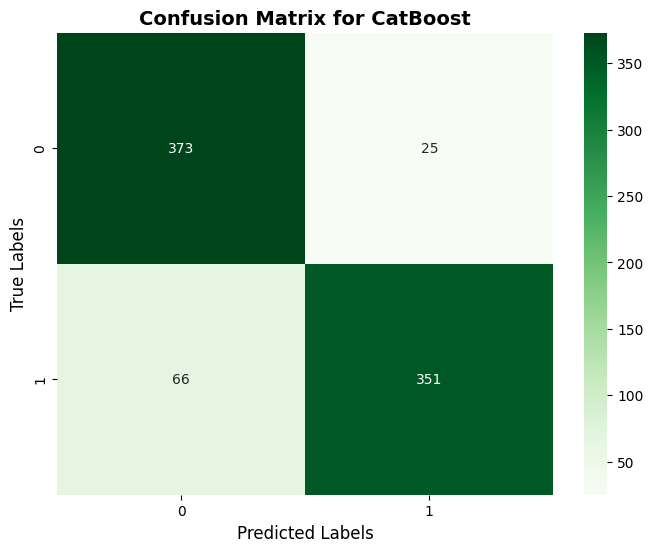

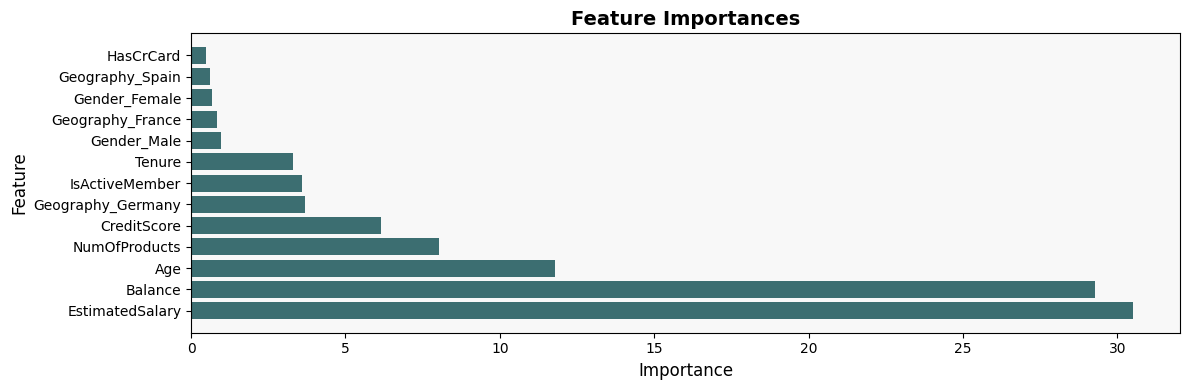

In [30]:
best_model_index = f1_scores.index(max(f1_scores))
best_model_name = names[best_model_index]
best_model = models[best_model_index][1]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 4))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices])
plt.yticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

### Using oversampling

As a result, the best model for predicting customer churn is the Random Forest model using the oversampling method. Its accuracy is 95% and the probability of a type 1 or type 2 error does not exceed 5%. Important features for the model are the client's age, balance, and number of banking services. The most influential features for the model include the client's age, account balance, and the number of banking services they use

In [31]:
class_distribution_before = Counter(df['Exited'])
ros = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

class_distribution_after = Counter(y_ros)
class_distribution_before, class_distribution_after

(Counter({0: 7963, 1: 2037}), Counter({1: 7963, 0: 7963}))


Results Table:
      Model  Accuracy  Precision    Recall  F1 Score  Execution Time (s)
0        LR  0.748274   0.748942  0.748274  0.748204            0.018907
1       KNN  0.822976   0.826576  0.822976  0.822349            0.345487
2      CART  0.914626   0.921853  0.914626  0.914189            0.124993
3        RF  0.954175   0.956014  0.954175  0.954111            1.493661
4       SVM  0.799435   0.799842  0.799435  0.799417            5.250300
5       XGB  0.903641   0.904633  0.903641  0.903551            0.116167
6  CatBoost  0.866290   0.866339  0.866290  0.866273            4.933819


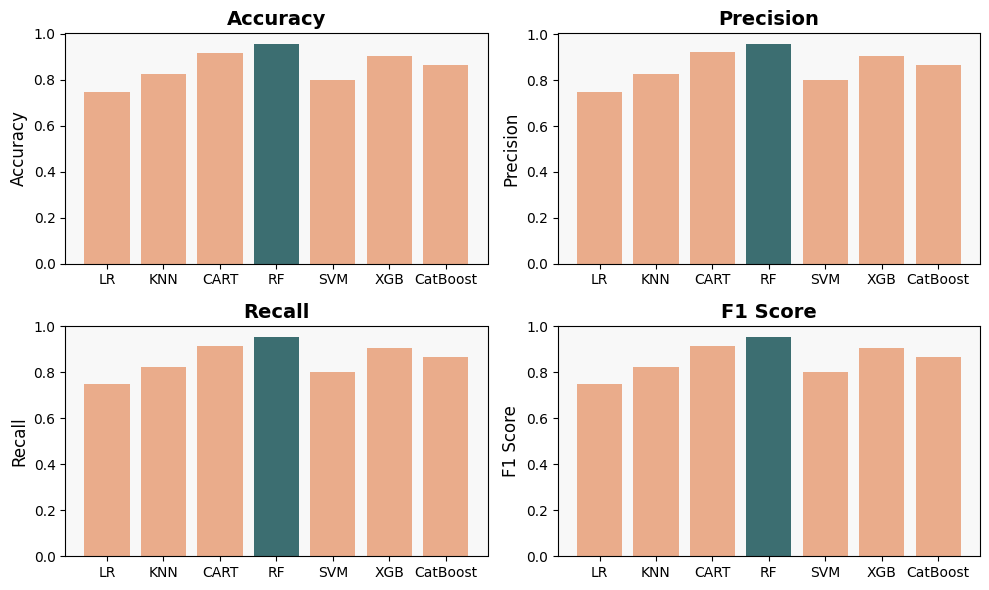

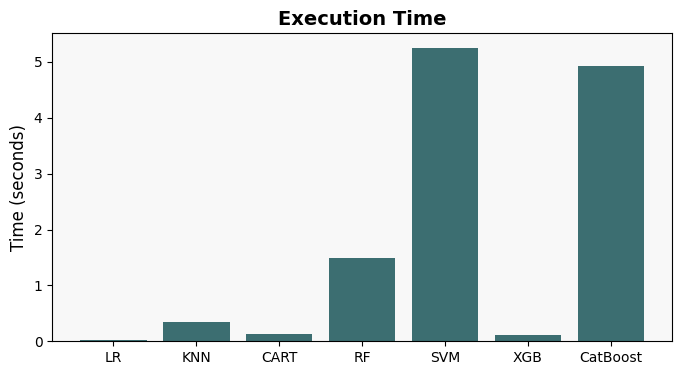

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
times = []

for name, model in models:
    start_time = time.time() 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    end_time = time.time() 
    
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")  
    f1 = f1_score(y_test, y_pred, average="weighted")  
    elapsed_time = end_time - start_time  
    
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    times.append(elapsed_time)

best_accuracy_index = accuracies.index(max(accuracies))
best_precision_index = precisions.index(max(precisions))
best_recall_index = recalls.index(max(recalls))
best_f1_index = f1_scores.index(max(f1_scores))
best_time_index = times.index(min(times))  

results_df = pd.DataFrame({
    'Model': names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Execution Time (s)': times
})

print("\nResults Table:")
print(results_df)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].bar(names, accuracies, color='#eaac8b')
ax[0, 0].bar(names[best_accuracy_index], accuracies[best_accuracy_index], color='#3c6e71')  
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Accuracy')

ax[0, 1].bar(names, precisions, color='#eaac8b')
ax[0, 1].bar(names[best_precision_index], precisions[best_precision_index], color='#3c6e71')  
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Precision')

ax[1, 0].bar(names, recalls, color='#eaac8b')
ax[1, 0].bar(names[best_recall_index], recalls[best_recall_index], color='#3c6e71') 
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Recall')

ax[1, 1].bar(names, f1_scores, color='#eaac8b')
ax[1, 1].bar(names[best_f1_index], f1_scores[best_f1_index], color='#3c6e71') 
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(names, times)
plt.title('Execution Time')
plt.ylabel('Time (seconds)')
plt.show()


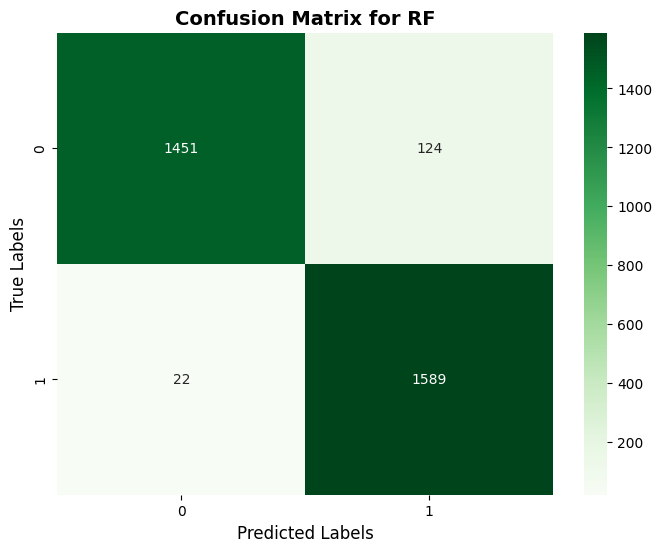

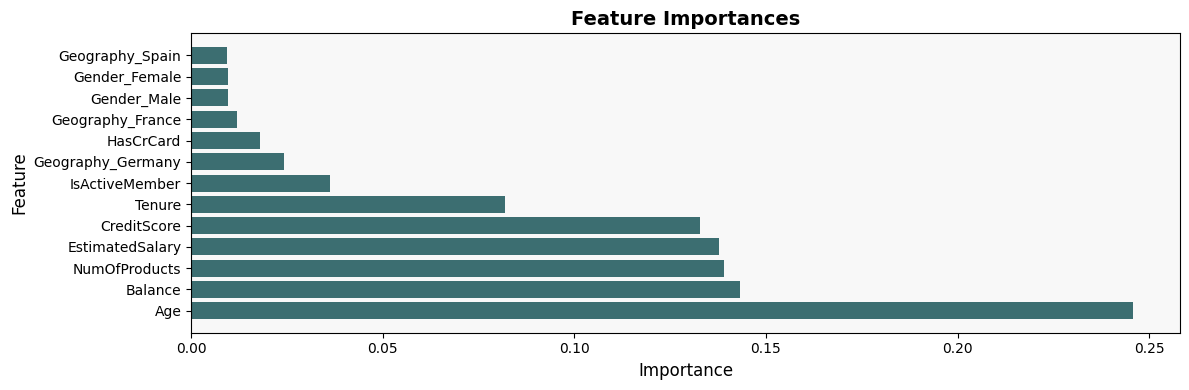

In [33]:
best_model_index = f1_scores.index(max(f1_scores))
best_model_name = names[best_model_index]
best_model = models[best_model_index][1]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 4))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices])
plt.yticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

### Conclusion
The project revealed critical insights into customer churn patterns, enabling a deeper understanding of the factors influencing customer behavior. Geographically, Germany exhibits the highest churn rate at 32%, despite representing only 25% of the customer base, highlighting the need for region-specific retention efforts. France and Spain, with lower churn rates of 16%, show more stable customer bases, but maintaining engagement in these regions remains crucial. Additionally, demographic patterns show that female customers and clients aged 50-60 are more likely to churn, emphasizing the importance of targeted engagement strategies for these groups. <br>

Behavioral analysis reveals that inactive customers, who make up 48% of the bank’s clientele, have a significantly higher churn rate (27%) compared to active customers (14%). This underscores the necessity of initiatives to activate dormant customers. Furthermore, customers with 3 or more products demonstrate disproportionately high churn rates, suggesting that overloading customers with services may lead to dissatisfaction. Addressing these behavioral patterns through personalized engagement and optimizing the product portfolio could improve retention rates. <br>

Key financial indicators, such as account balances and credit scores, also play a vital role in predicting churn. Customers with credit scores below 400 consistently churn, making creditworthiness a significant predictive factor. Moreover, high-value customers with larger balances are more likely to leave, potentially due to unmet service expectations or more attractive alternatives. This highlights the need for tailored retention strategies and premium service offerings to address dissatisfaction among this segment. <br>

The Random Forest model with oversampling proved to be the most effective in predicting customer churn, achieving an accuracy of 95%. Influential features include client age, account balance, and the number of banking services utilized. By integrating this model into the bank’s CRM system, the bank can proactively identify high-risk customers and implement targeted retention campaigns. These insights and predictive capabilities position the bank to significantly reduce churn, enhance customer satisfaction, and increase profitability.